In [239]:
!pip install opencv-python


In [240]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [241]:
messi = 'Merge_Images\static\images\messi.jpg'
flowers = 'Merge_Images\static\images\My project.jpg'

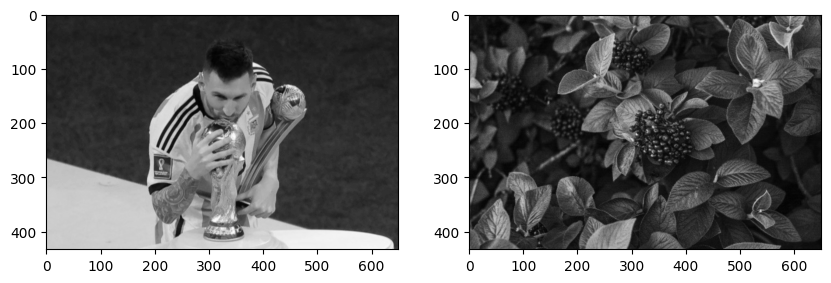

In [242]:
messi = cv2.imread(messi, 0)
flower = cv2.imread(flowers, 0)

plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi, cmap='gray')
plt.subplot(122)
plt.imshow(flower, cmap='gray')
plt.show()


In [243]:
def get_size_of_images(img):
  
    # get width and height
    width = img.shape[1]
    height = img.shape[0]
    print ("the width is" , width)
    print ("the height is" , height)
    return width , height


In [244]:
def dimension_to_transform(img_1,img_2):
    width1 , height1  = get_size_of_images(img_1)
    width2 , height2  = get_size_of_images(img_2)
    if (width1 > width2):
        width = width2
    else:
        width = width1
    
    if (height1 > height2):
        height = height2
    else:
        height = height1

    return width , height

In [245]:
def Resizing_image(img_1 , img_2):
    width , height = dimension_to_transform(img_1,img_2)
    print(width)
    print(height)
    cv2.resize(img_1 , (width,height))
    cv2.resize(img_2 , (width,height))
    return img_1 , img_2


    

In [246]:
messi_resized , flower_resized =Resizing_image(messi,flower)

the width is 650
the height is 433
the width is 650
the height is 433
650
433


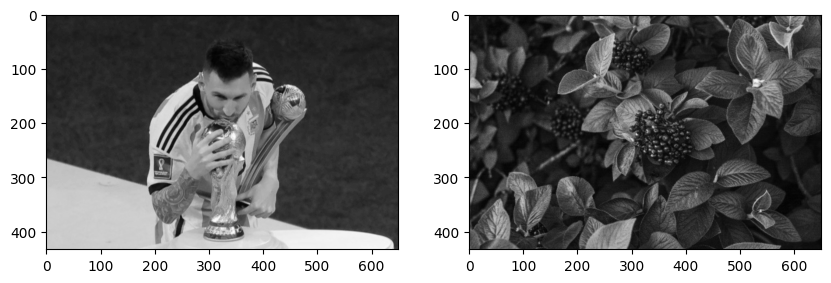

In [247]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(messi_resized, cmap='gray')
plt.subplot(122)
plt.imshow(flower_resized, cmap='gray')
plt.show()

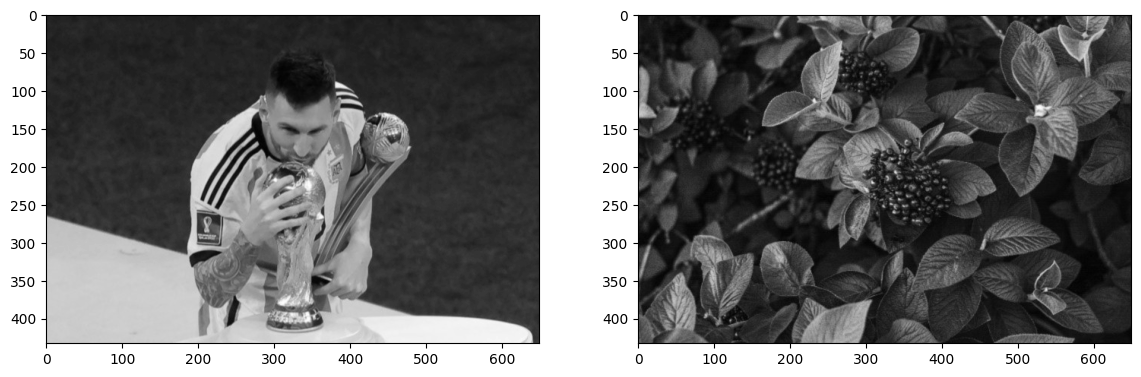

In [248]:

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(messi_resized, cmap='gray')
plt.subplot(122)
plt.imshow(flower_resized, cmap='gray')
plt.show()

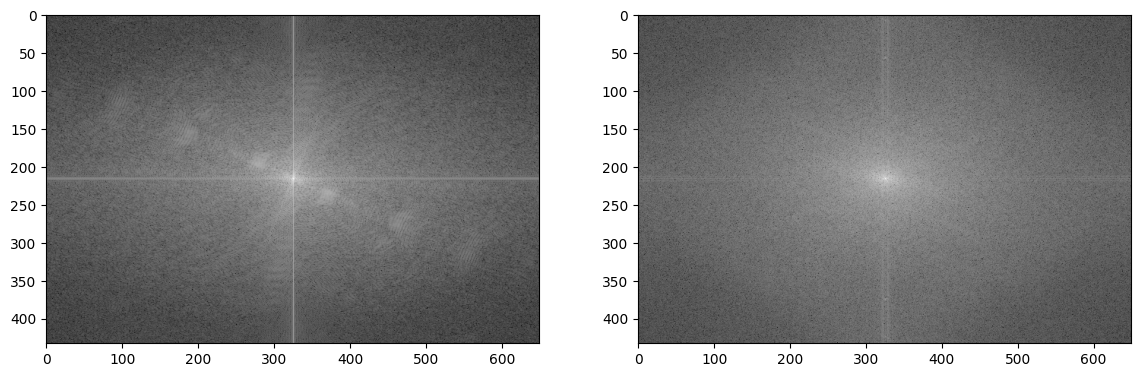

In [249]:
messi_fft = np.fft.fftshift(np.fft.fft2(messi_resized))
flower_fft = np.fft.fftshift(np.fft.fft2(flower_resized))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(np.abs(messi_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(flower_fft)), cmap='gray')
plt.show()

In [250]:
messi_amplitude = np.sqrt(np.real(messi_fft) ** 2 + np.imag(messi_fft) ** 2)
messi_phase = np.arctan2(np.imag(messi_fft), np.real(messi_fft))
flower_amplitude = np.sqrt(np.real(flower_fft) ** 2 + np.imag(flower_fft) ** 2)
flower_phase = np.arctan2(np.imag(flower_fft), np.real(flower_fft))

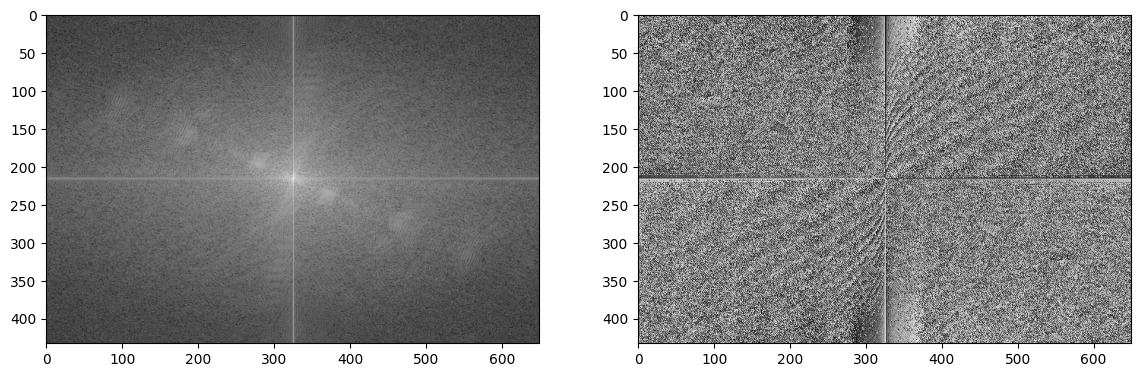

In [251]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(messi_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(messi_phase, cmap='gray')

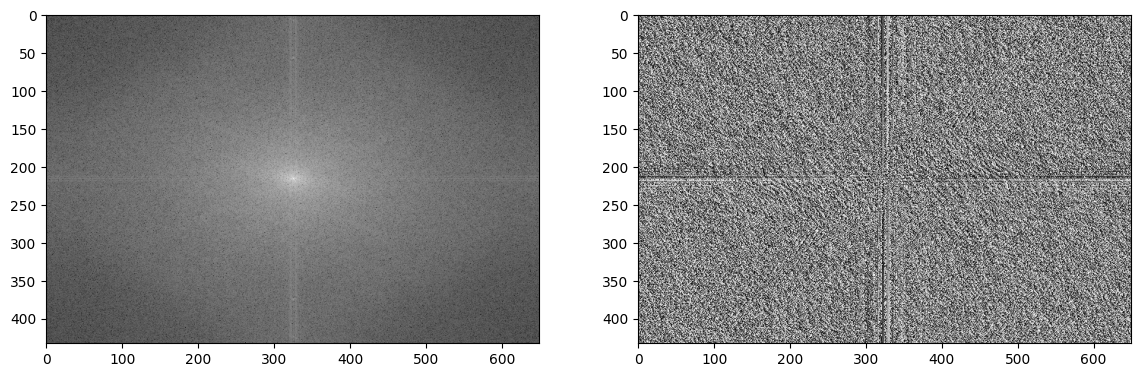

In [252]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(flower_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(flower_phase, cmap='gray')

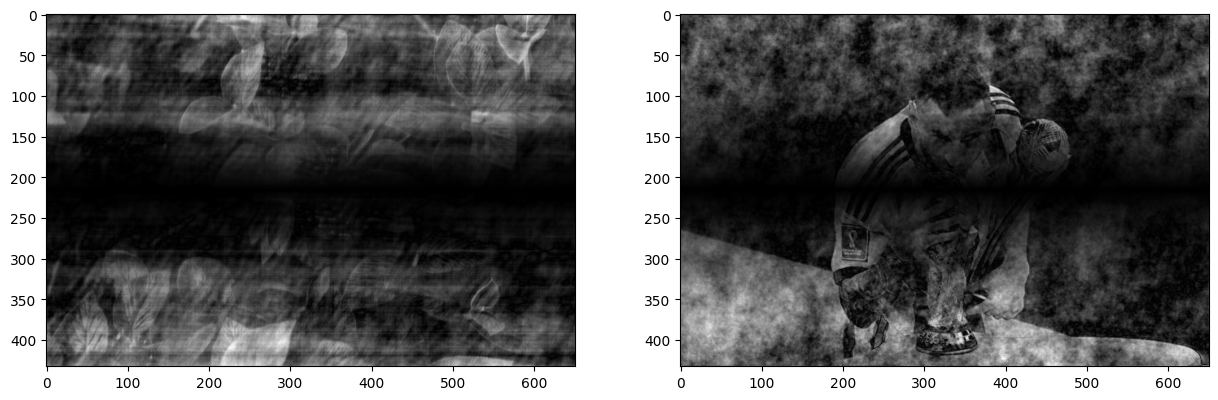

In [253]:
# amplitude_phase
messi_flower_comb = np.multiply(messi_amplitude, np.exp(1j * flower_phase))
messi_flower = np.real(np.fft.ifft2(messi_flower_comb))  # drop imagniary as they are around 1e-14

flower_messi_comb = np.multiply(flower_amplitude, np.exp(1j * messi_phase))
flower_messi = np.real(np.fft.ifft2(flower_messi_comb ))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(121)
plt.imshow(np.abs(messi_flower), cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(flower_messi), cmap='gray')
